In [1]:
# 此文件实现了对Iris数据集的多种分类任务
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.naive_bayes as bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def model_test(y_test, y_pred, average="macro"):
  print("Precision:", metrics.precision_score(y_test, y_pred, average=average))
  print("Recall:", metrics.recall_score(y_test, y_pred, average=average))
  print("f1:", metrics.f1_score(y_test, y_pred, average=average))


def plot_mat(y_test, y_pred):
  mat = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
  plt.xlabel('true label')
  plt.ylabel('predicted label')

In [3]:
# 导入数据集
df = pd.read_csv("german.csv", header=None)
data = np.array(df)
x = data[:, :-1]
y = data[:, -1]

In [4]:
pca = PCA(n_components=15).fit(x)
x = pca.transform(x)


# 朴素贝叶斯

Precision: 0.650952380952381
Recall: 0.6966550038462493
f1: 0.6622322459162018


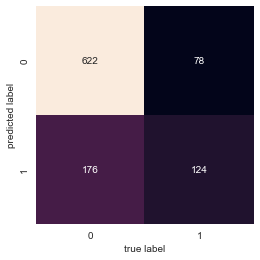

In [5]:
bayes_cls = bayes.GaussianNB()
y_pred = cross_val_predict(bayes_cls, x, y, cv=10)
model_test(y_pred, y)
plot_mat(y_pred, y)

# 逻辑回归

Precision: 0.6690476190476191
Recall: 0.656043956043956
f1: 0.6603988603988604


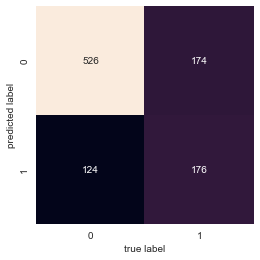

In [6]:
logistic_cls = LogisticRegression(solver='saga', tol=0.1)
y_pred_1 = cross_val_predict(logistic_cls, x, y, cv=10)
model_test(y_pred_1, y)
plot_mat(y_pred_1, y)

# SVM（高斯核）

Precision: 0.5538095238095239
Recall: 0.7068233399223955
f1: 0.527078981212447


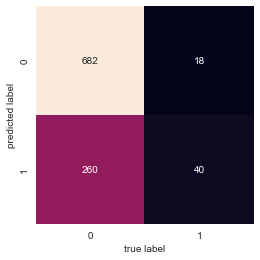

In [7]:
SVC_cls = SVC(kernel="rbf")
y_pred_2 = cross_val_predict(SVC_cls, x, y, cv=10)
model_test(y_pred_2, y)
plot_mat(y_pred_2, y)

# SVM（线性核）

Precision: 0.6583333333333333
Recall: 0.7118171683389075
f1: 0.6711299036880433


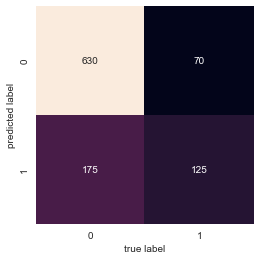

In [8]:
SVC_cls_1 = SVC(kernel="linear")
y_pred_3 = cross_val_predict(SVC_cls_1, x, y, cv=10)
model_test(y_pred_3, y)
plot_mat(y_pred_3, y)

# 决策树

Precision: 0.6397619047619048
Recall: 0.6306075587734015
f1: 0.6338043367209302


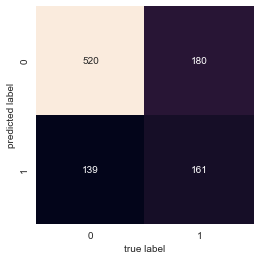

In [9]:
decision_cls = DecisionTreeClassifier()
y_pred_4 = cross_val_predict(decision_cls, x, y, cv=10)
model_test(y_pred_4, y)
plot_mat(y_pred_4, y)

# 随机森林

Precision: 0.6195238095238095
Recall: 0.6730748014121801
f1: 0.6278038774564944


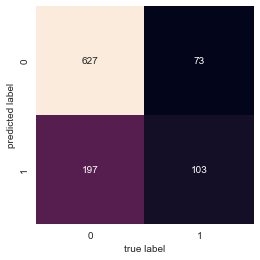

In [10]:
rand_forest_cls = RandomForestClassifier(n_estimators=10)
y_pred_5 = cross_val_predict(rand_forest_cls, x, y, cv=10)
model_test(y_pred_5, y)
plot_mat(y_pred_5, y)